# rf309_ndimplot
Multidimensional models: making 2/3 dimensional plots of pdfs and datasets




**Author:**  Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:18 AM.</small></i>

In [1]:
import ROOT

Create 2D model and dataset
-----------------------------------------------------

Create observables

In [2]:
x = ROOT.RooRealVar("x", "x", -5, 5)
y = ROOT.RooRealVar("y", "y", -5, 5)

Create parameters

In [3]:
a0 = ROOT.RooRealVar("a0", "a0", -3.5, -5, 5)
a1 = ROOT.RooRealVar("a1", "a1", -1.5, -1, 1)
sigma = ROOT.RooRealVar("sigma", "width of gaussian", 1.5)

Create interpreted function f(y) = a0 - a1*sqrt(10*abs(y))

In [4]:
fy = ROOT.RooFormulaVar("fy", "a0-a1*sqrt(10*abs(y))", [y, a0, a1])

Create gauss(x,f(y),s)

In [5]:
model = ROOT.RooGaussian("model", "Gaussian with shifting mean", x, fy, sigma)

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [-inf, inf] of the RooGaussian 'model' exceeds the safe range of (0, inf). Advise to limit its range.


Sample dataset from gauss(x,y)

In [6]:
data = model.generate({x, y}, 10000)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Make 2D plots of data and model
-------------------------------------------------------------

Create and fill ROOT 2D histogram (20x20 bins) with contents of dataset

In [7]:
hh_data = data.createHistogram("x,y", x, Binning=20, YVar=dict(var=y, Binning=20))

Create and fill ROOT 2D histogram (50x50 bins) with sampling of pdf
hh_pdf = model.createHistogram("hh_model", x, Binning=50, YVar=dict(var=y, Binning=50))

In [8]:
hh_pdf = model.createHistogram("x,y", 50, 50)
hh_pdf.SetLineColor(ROOT.kBlue)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Create 3D model and dataset
-----------------------------------------------------

Create observables

In [9]:
z = ROOT.RooRealVar("z", "z", -5, 5)

gz = ROOT.RooGaussian("gz", "gz", z, 0.0, 2.0)
model3 = ROOT.RooProdPdf("model3", "model3", [model, gz])

data3 = model3.generate({x, y, z}, 10000)

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Make 3D plots of data and model
-------------------------------------------------------------

Create and fill ROOT 2D histogram (8x8x8 bins) with contents of dataset
hh_data3 = data3.createHistogram("hh_data3", x, Binning=8, YVar=(var=y, Binning=8), ZVar=(var=z, Binning=8))

In [10]:
hh_data3 = data3.createHistogram(
    "hh_data3",
    x,
    Binning=8,
    YVar=dict(var=y, Binning=8),
    ZVar=dict(var=z, Binning=8),
)

Create and fill ROOT 2D histogram (20x20x20 bins) with sampling of pdf

In [11]:
hh_pdf3 = model3.createHistogram(
    "hh_model3",
    x,
    Binning=20,
    YVar=dict(var=y, Binning=20),
    ZVar=dict(var=z, Binning=20),
)
hh_pdf3.SetFillColor(ROOT.kBlue)

c1 = ROOT.TCanvas("rf309_2dimplot", "rf309_2dimplot", 800, 800)
c1.Divide(2, 2)
c1.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
hh_data.GetZaxis().SetTitleOffset(1.4)
hh_data.Draw("lego")
c1.cd(2)
ROOT.gPad.SetLeftMargin(0.20)
hh_pdf.GetZaxis().SetTitleOffset(2.5)
hh_pdf.Draw("surf")
c1.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
hh_data.GetZaxis().SetTitleOffset(1.4)
hh_data.Draw("box")
c1.cd(4)
ROOT.gPad.SetLeftMargin(0.15)
hh_pdf.GetZaxis().SetTitleOffset(2.5)
hh_pdf.Draw("cont3")
c1.SaveAs("rf309_2dimplot.png")

c2 = ROOT.TCanvas("rf309_3dimplot", "rf309_3dimplot", 800, 400)
c2.Divide(2)
c2.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
hh_data3.GetZaxis().SetTitleOffset(1.4)
hh_data3.Draw("lego")
c2.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
hh_pdf3.GetZaxis().SetTitleOffset(1.4)
hh_pdf3.Draw("iso")
c2.SaveAs("rf309_3dimplot.png")

[#1] INFO:NumericIntegration -- RooRealIntegral::init(model_Int[x,y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Info in <TCanvas::Print>: png file rf309_2dimplot.png has been created
Info in <TCanvas::Print>: png file rf309_3dimplot.png has been created


Draw all canvases 

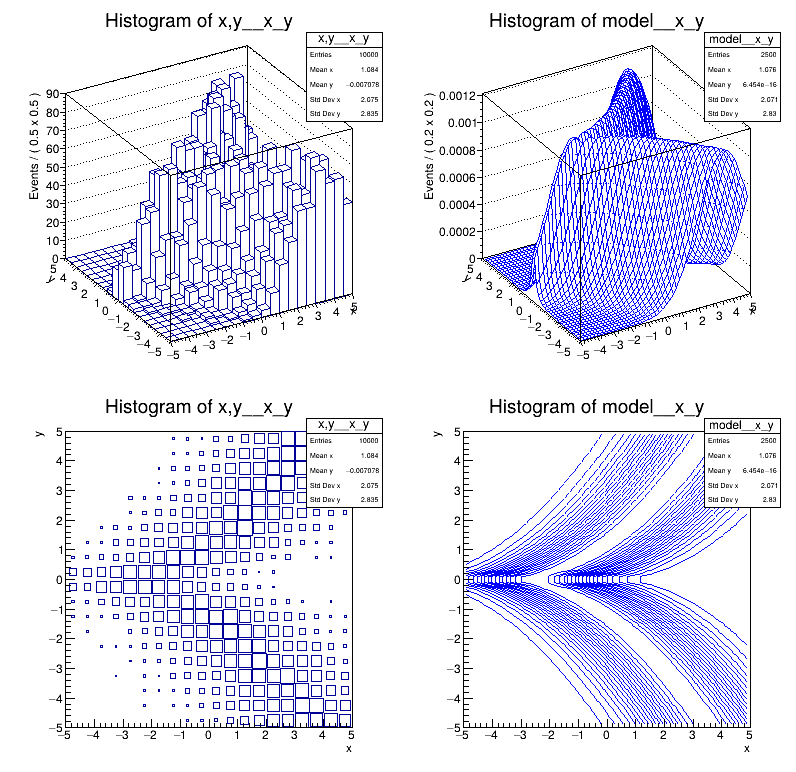

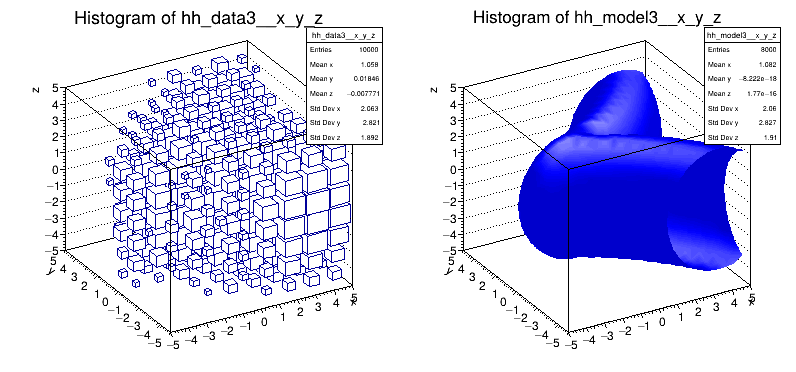

In [12]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()